<a href="https://colab.research.google.com/github/satwik-goyal/CR-CWK/blob/main/CR_CWK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Reshape , Multiply, Activation
from tensorflow.keras.layers import Input, DepthwiseConv2D, GlobalAveragePooling2D , Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.legacy import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0



In [4]:
 # Load CIFAR100 dataset
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

169001437/169001437 [==============================] - 13s 0us/step


In [5]:
print("Shape of the data " , X_train[0].shape)

Shape of the data  (32, 32, 3)


Sample input image: [[[0.98039216 0.98039216 0.972549  ]
  [0.972549   0.9764706  0.9529412 ]
  [0.96862745 0.972549   0.9372549 ]
  ...
  [0.98039216 0.98039216 0.9647059 ]
  [0.98039216 0.98039216 0.9647059 ]
  [0.9764706  0.98039216 0.9647059 ]]

 [[0.98039216 0.9843137  0.9607843 ]
  [0.972549   0.9764706  0.93333334]
  [0.96862745 0.96862745 0.91764706]
  ...
  [0.9843137  0.9843137  0.9490196 ]
  [0.9843137  0.9882353  0.9529412 ]
  [0.98039216 0.9843137  0.9529412 ]]

 [[0.9843137  0.9843137  0.95686275]
  [0.98039216 0.972549   0.92941177]
  [0.98039216 0.9607843  0.9137255 ]
  ...
  [0.98039216 0.9764706  0.93333334]
  [0.98039216 0.9764706  0.9411765 ]
  [0.98039216 0.9764706  0.9490196 ]]

 ...

 [[0.8666667  0.8352941  0.7490196 ]
  [0.8666667  0.80784315 0.6901961 ]
  [0.88235295 0.8117647  0.70980394]
  ...
  [0.78039217 0.6901961  0.5254902 ]
  [0.8117647  0.75686276 0.64705884]
  [0.9137255  0.8980392  0.8862745 ]]

 [[0.88235295 0.8745098  0.8       ]
  [0.8901961  0.8

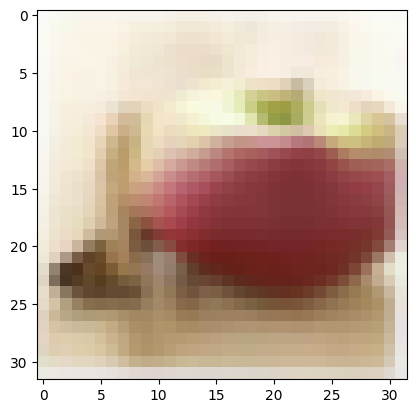

In [6]:
Selected_Image = 2
image = X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

In [37]:
# def EfficientNet(input_shape, num_classes):
#     inputs = Input(shape=input_shape)

#     # Base Block
#     x = Conv2D(256, (3, 3), padding='same', activation='swish')(inputs)
#     x = BatchNormalization()(x)

#     # Middle Block (Repeat this block multiple times)
#     for _ in range(7):
#       x = DepthwiseConv2D((3, 3), padding='same', activation='swish')(x)
#       x = BatchNormalization()(x)

#       # Squeeze and excitation
#       se = GlobalAveragePooling2D()(x)
#       se = Reshape((1, 1, int(x.shape[-1])))(se)
#       se = Dense(int(x.shape[-1]) // 32, activation='swish')(se)
#       se = Dense(int(x.shape[-1]), activation='sigmoid')(se)
#       se = Reshape((1, 1, int(x.shape[-1])))(se)
#       x = Multiply()([x, se])
#       x = Conv2D(128, (1, 1), padding='same', activation='swish')(x)
#       x = BatchNormalization()(x)
#       x = Dropout(0.2)(x)

#     # Top Block
#     x = GlobalAveragePooling2D()(x)
#     x = Dropout(0.2)(x)
#     x = Dense(256, activation='softmax')(x)
#     x = Dropout(0.2)(x)
#     x = Dense(num_classes, activation='softmax')(x)

#     # Create the model
#     model = tf.keras.Model(inputs, x)

#     return model


from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape = (32,32,3) , include_top= False , weights="imagenet",
    classes=100)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D(name="avg_pool"))
model.add(BatchNormalization())
model.add(Dropout(0.2, name="top_dropout"))
model.add(Dense(100 , activation="softmax", name="pred"))
model.compile(optimizer= Adam(learning_rate=1e-2), loss="categorical_crossentropy", metrics=["accuracy"])

94765736/94765736 [==============================] - 5s 0us/step


In [38]:
# model = EfficientNet((32,32,3),100)




model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 avg_pool (GlobalAveragePoo  (None, 2048)              0         
 ling2D)                                                         
                                                                 
 batch_normalization_50 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 top_dropout (Dropout)       (None, 2048)              0         
                                                                 
 pred (Dense)                (None, 100)               204900    
                                                                 
Total params: 23800804 (90.79 MB)
Trainable params: 23

In [39]:
model.fit(X_train, y_train, batch_size = 128 , epochs = 100 , validation_split = 0.1)

Epoch 1/100
352/352 [==============================] - 32s 72ms/step - loss: 5.9480 - accuracy: 0.0124 - val_loss: 4.6517 - val_accuracy: 0.0106
Epoch 2/100
352/352 [==============================] - 24s 69ms/step - loss: 4.5407 - accuracy: 0.0233 - val_loss: 4.4943 - val_accuracy: 0.0226
Epoch 3/100
352/352 [==============================] - 24s 68ms/step - loss: 4.3346 - accuracy: 0.0356 - val_loss: 4.2900 - val_accuracy: 0.0454
Epoch 4/100
352/352 [==============================] - 24s 68ms/step - loss: 4.1420 - accuracy: 0.0577 - val_loss: 7.5360 - val_accuracy: 0.0388
Epoch 5/100
352/352 [==============================] - 24s 68ms/step - loss: 4.0569 - accuracy: 0.0694 - val_loss: 4.0494 - val_accuracy: 0.0780
Epoch 6/100
352/352 [==============================] - 24s 69ms/step - loss: 3.9500 - accuracy: 0.0865 - val_loss: 91.3168 - val_accuracy: 0.0556
Epoch 7/100
352/352 [==============================] - 24s 69ms/step - loss: 3.8271 - accuracy: 0.1026 - val_loss: 8.5451 - val_a

KeyboardInterrupt: 

In [40]:
history = model.evaluate(X_test , y_test)

313/313 [==============================] - 4s 12ms/step - loss: 20.4742 - accuracy: 0.3335
